# MATPLOTLIB CUSTOMIZATIONS

In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filtering for DA roles

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. Recreate the chart from 03.12. Ex_TrendingSkills.ipynb

In [16]:
# create a new colum for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
# explode the job_skills column
df_DA_explode = df_DA.explode('job_skills')
df_DA_pv = df_DA_explode.pivot_table(index= 'job_posted_month_no', columns='job_skills',aggfunc='size')

# sort the skills by count
df_DA_pv.loc['Total'] = df_DA_pv.sum()
df_DA_pv = df_DA_pv[df_DA_pv.loc['Total'].sort_values(ascending=False).index]
df_DA_pv = df_DA_pv.drop('Total')
# use month names for plotting
df_DA_pv = df_DA_pv.reset_index()
df_DA_pv['job_posted_month'] = df_DA_pv['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pv = df_DA_pv.set_index('job_posted_month')

df_DA_pv = df_DA_pv.drop(columns = 'job_posted_month_no')




job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
Jan,11336.0,8170.0,6606.0,5596.0,4285.0
Feb,7947.0,5772.0,4751.0,3936.0,3307.0
Mar,7868.0,5675.0,4741.0,4051.0,3176.0
Apr,7553.0,5496.0,4557.0,3776.0,3106.0
May,6617.0,4773.0,4070.0,3245.0,2695.0
Jun,7584.0,5724.0,4707.0,3812.0,3275.0
Jul,7687.0,5513.0,4831.0,3928.0,3350.0
Aug,8823.0,6482.0,5576.0,4533.0,3859.0
Sep,6829.0,4886.0,4229.0,3446.0,3118.0


Text(0, 0.5, 'Count of Job Postings')

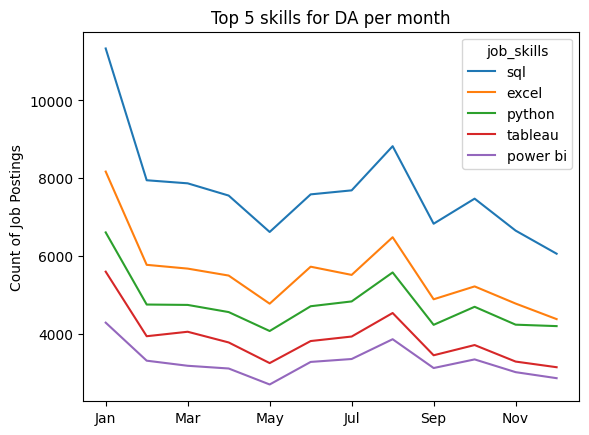

In [18]:
# get the top 5 skills
df_DA_pv.iloc[:,:5].plot(kind='line')

# add chart elements
plt.title('Top 5 skills for DA per month')
plt.xlabel('')
plt.ylabel('Count of Job Postings')


2. Customize the chart area of the plot 

Text(0, 0.5, 'Count of Job Postings')

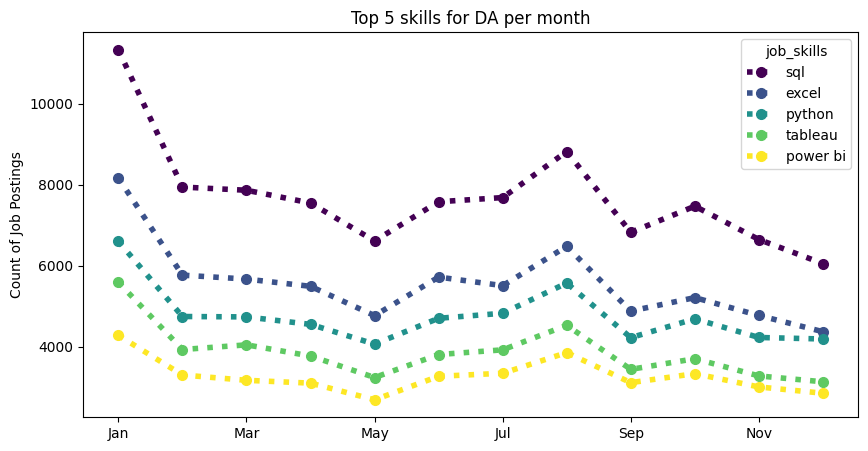

In [41]:
df_DA_pv.iloc[:,:5].plot(
    kind = 'line',
    linewidth = 4,
    linestyle = ':', # other options: '-', '--', '-.'
    colormap= 'viridis', # other colormaps: 'inferno', 'plasma', 'magma', 'cividis',..
    marker = 'o',
    markersize = 7,
    figsize= (10,5)
)

plt.title('Top 5 skills for DA per month')
plt.xlabel('')
plt.ylabel('Count of Job Postings')

3. Recreate the chart from 04.03. MatPlotLib_Scatter_Plots.ipynb

In [43]:
# Exploded the job_skills into individual rows
df_exploded = df.explode('job_skills').copy()

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby(by='job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)
                                  

# Limit to the top skills
skill_num = 20
skill_stats = skill_stats.sort_values(by='skill_count',ascending=False).head(skill_num)
skill_stats



,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


Text(0, 0.5, 'Median Salary')

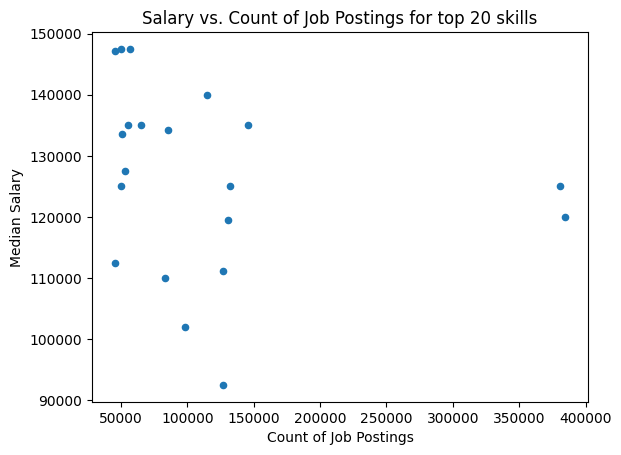

In [45]:
# Create a scatter plot
skill_stats.plot(
    kind = 'scatter',
    x= 'skill_count',
    y= 'median_salary'
)

plt.title(f'Salary vs. Count of Job Postings for top {skill_num} skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.tight_layout()

4. Customizing the label of data points on the scatter plot

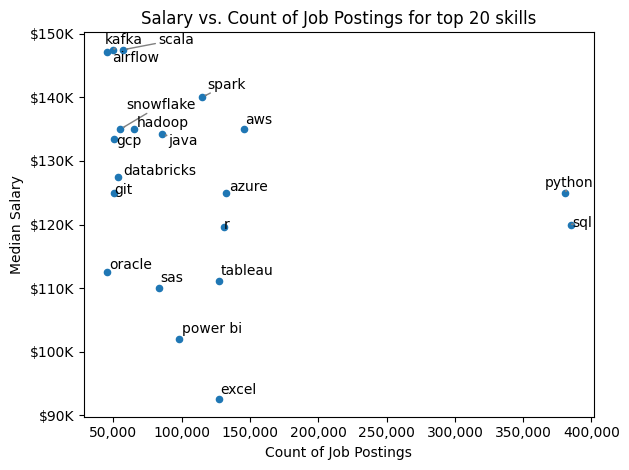

In [61]:
from adjustText import adjust_text
# fig, ax = plt.subplots()



skill_stats.plot(
    kind = 'scatter',
    x= 'skill_count',
    y= 'median_salary'
)


# get the current axes (both x and y) of the scatter plot 
ax = plt.gca() 

# format the major tick values of the y axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# format the major tick values of the x axis to have comma separator
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}'))

texts= []
# use the skill names as data label for each data point
for i, text in enumerate(skill_stats.index):
     texts.append(plt.text(x= skill_stats['skill_count'].iloc[i],y=skill_stats['median_salary'].iloc[i], s= text ))
# adjust the position of the labels of the data points + arrows pointing from label to corressponding the marker  

adjust_text(texts, arrowprops = dict(arrowstyle = '->',color = 'gray', lw= 1))

# modify the ticker format of the y axis

plt.title(f'Salary vs. Count of Job Postings for top {skill_num} skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.tight_layout()